In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'
%load_ext tensorboard

======================start trainning=======================
dict_items([('cnn1', 253), ('cnn2', 163), ('dropout', 0.3952342422066885), ('learning_rate', 1.2668261188463256e-06)])
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 13s 221us/sample - loss: 2.2550 - accuracy: 0.1951
Epoch 2/2
60000/60000 [==============================] - 13s 214us/sample - loss: 2.1223 - accuracy: 0.4348
10000/10000 - 1s - loss: 2.0470 - accuracy: 0.6856
======================start trainning=======================
dict_items([('cnn1', 301), ('cnn2', 345), ('dropout', 0.3695440556889961), ('learning_rate', 0.05705166799715734)])
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 14s 233us/sample - loss: 3.1671 - accuracy: 0.1042
Epoch 2/2
60000/60000 [==============================] - 14s 228us/sample - loss: 2.3091 - accuracy: 0.1038
10000/10000 - 1s - loss: 2.3062 - accuracy: 0.1010
======================start trainning=======================
di

60000/60000 [==============================] - 17s 290us/sample - loss: 2.1159 - accuracy: 0.5643
Epoch 2/2
60000/60000 [==============================] - 17s 284us/sample - loss: 1.4240 - accuracy: 0.8087
10000/10000 - 1s - loss: 1.0157 - accuracy: 0.8427
======================start trainning=======================
dict_items([('cnn1', 476), ('cnn2', 258), ('dropout', 0.001), ('learning_rate', 0.0025682931186200054)])
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 15s 254us/sample - loss: 0.1002 - accuracy: 0.9695
Epoch 2/2
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0413 - accuracy: 0.9873
10000/10000 - 1s - loss: 0.0604 - accuracy: 0.9801
======================start trainning=======================
dict_items([('cnn1', 500), ('cnn2', 500), ('dropout', 0.001), ('learning_rate', 2.7943626146640738e-05)])
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 18s 294us/sample - loss: 0.4058 - accura

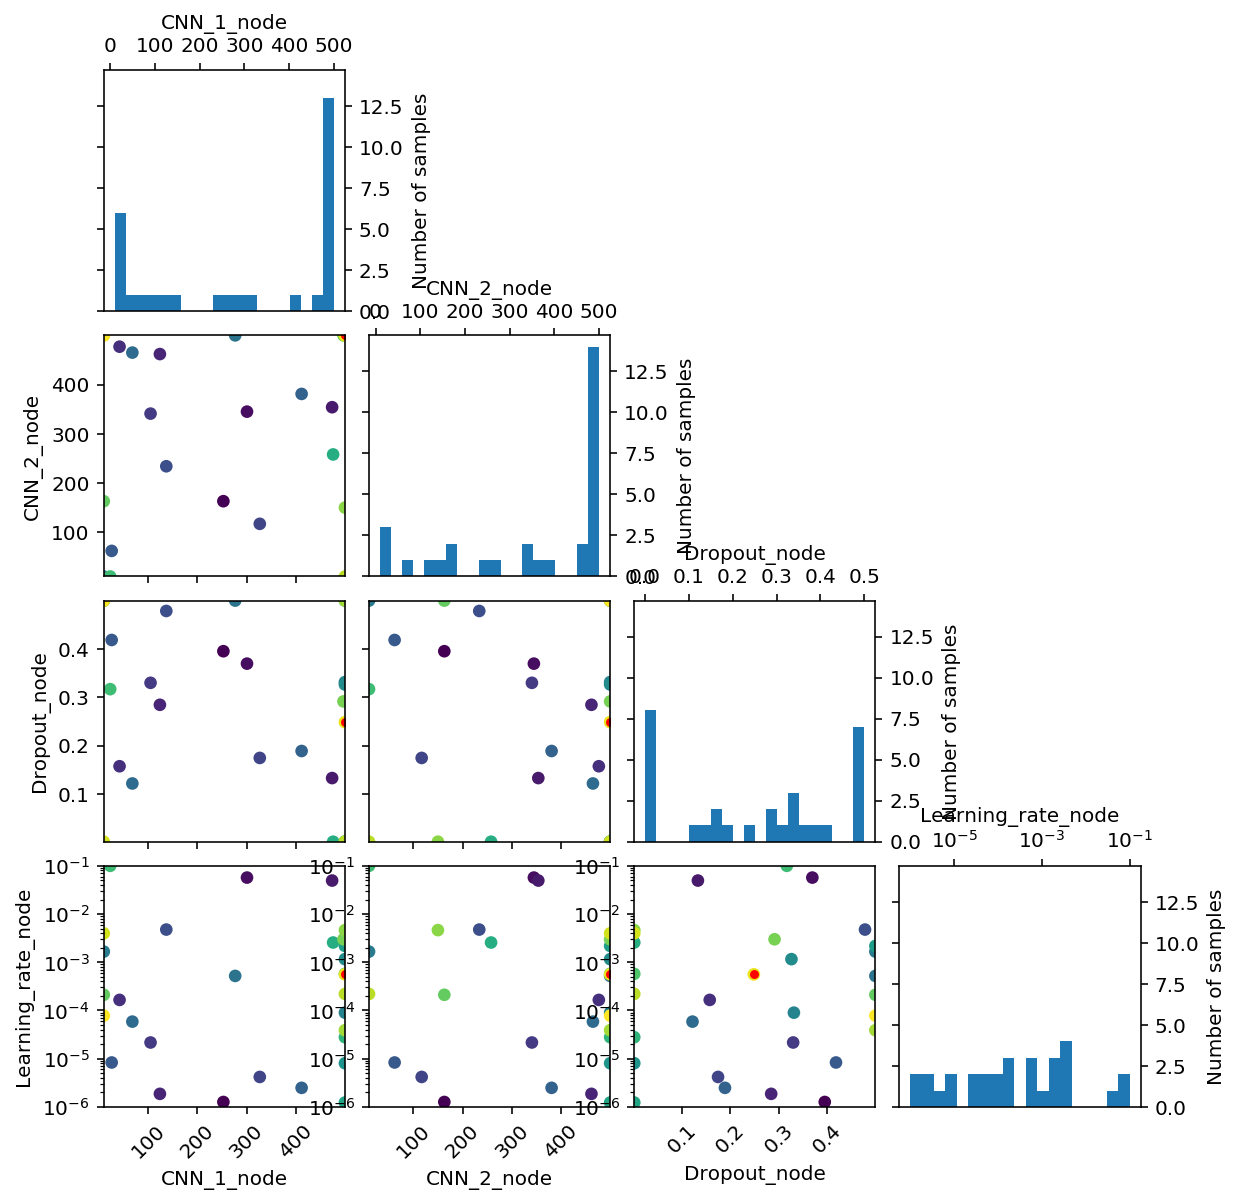

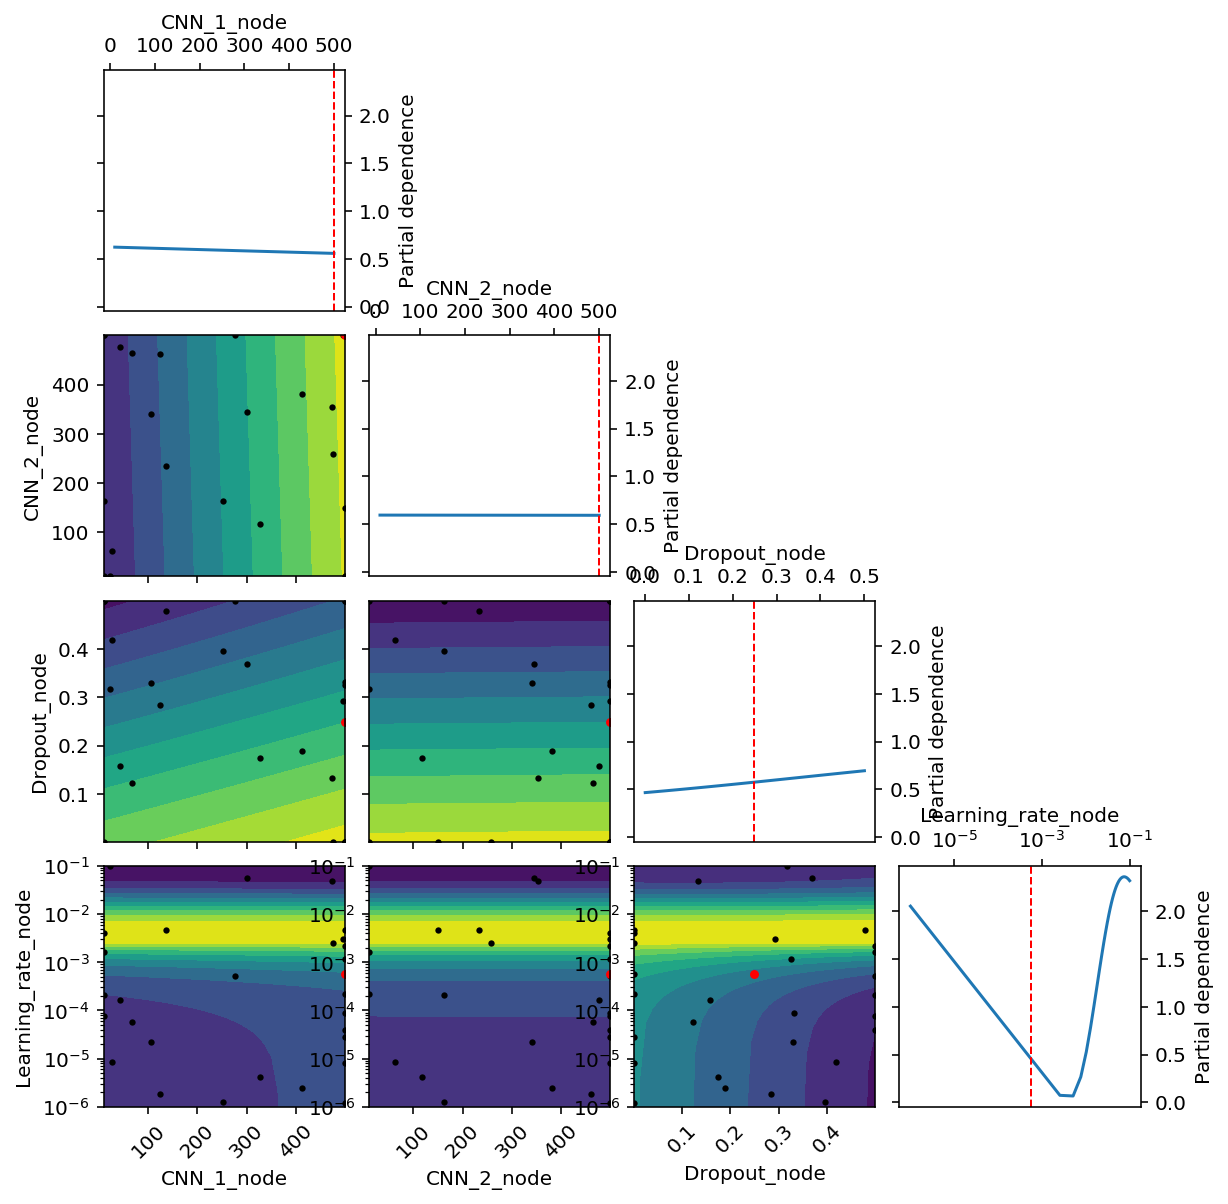

In [12]:
# %load skopt_module.py
import numpy as np
import skopt
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt.utils import use_named_args

from mnist import mnist

hp_dict = {
    'cnn1' : 50,
    'cnn2' : 50,
    'dropout' : 0.3,
    'learning_rate' : 0.001
    }

default_HP = list(hp_dict.values())

def mnist_model_tunning(hp_list):
    HP_list2dict = {
    'cnn1' : int(hp_list[0]),
    'cnn2' : int(hp_list[1]),
    'dropout' : float(hp_list[2]),
    'learning_rate' : float(hp_list[3])
    }
    print("======================start trainning=======================")
    print(HP_list2dict.items())
    mnist_model = mnist(hp_dict=HP_list2dict)
    mnist_model.model()
    mnist_model.training()
    mnist_model.evaluate()
    loss = mnist_model.loss
    return loss

dim_CNN_1_nodes = Integer(low=10, high=500, name='CNN_1_node')
dim_CNN_2_nodes = Integer(low=10, high=500, name='CNN_2_node')
dim_dropout_nodes = Real(low=0.001, high=0.5, name='Dropout_node')
dim_learning_rate_nodes = Real(low=1e-6, high=1e-1, prior='log-uniform',name='Learning_rate_node')

dimension_HP = [
                dim_CNN_1_nodes  ,
                dim_CNN_2_nodes  ,
                dim_dropout_nodes ,
                dim_learning_rate_nodes
                ]



n_cell = 30
n_random_starts = 10

gp_fitting = gp_minimize(func=mnist_model_tunning,
                        dimensions=dimension_HP,
                        n_calls=n_cell,
                        n_random_starts=n_random_starts,
                        acq_func='EI',
                        #x0=default_HP
                        )

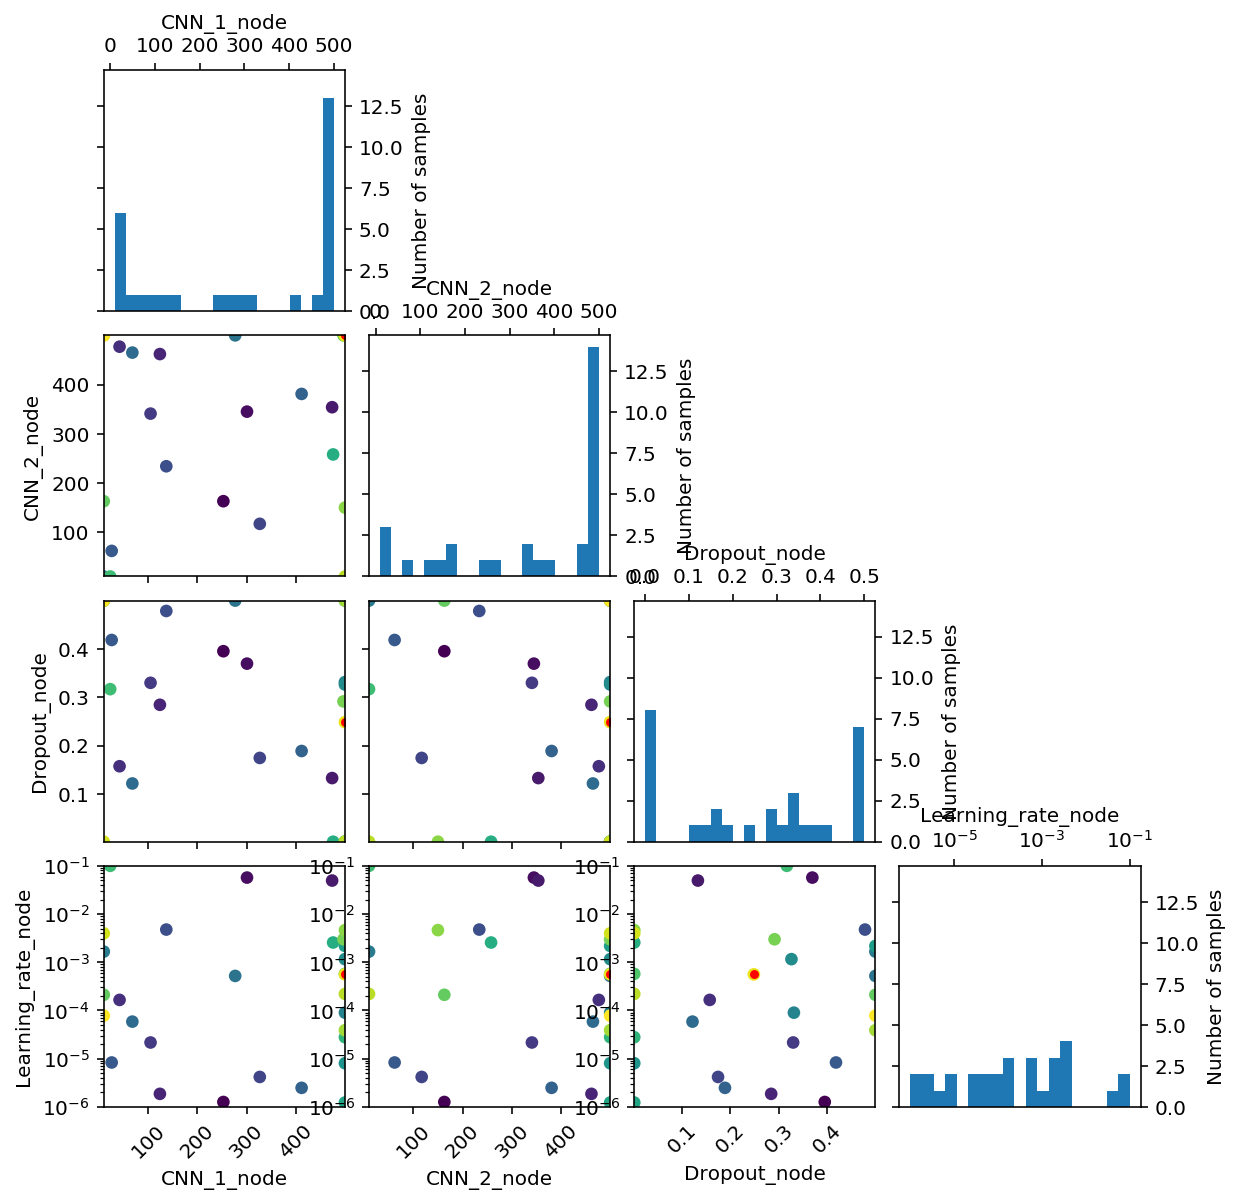

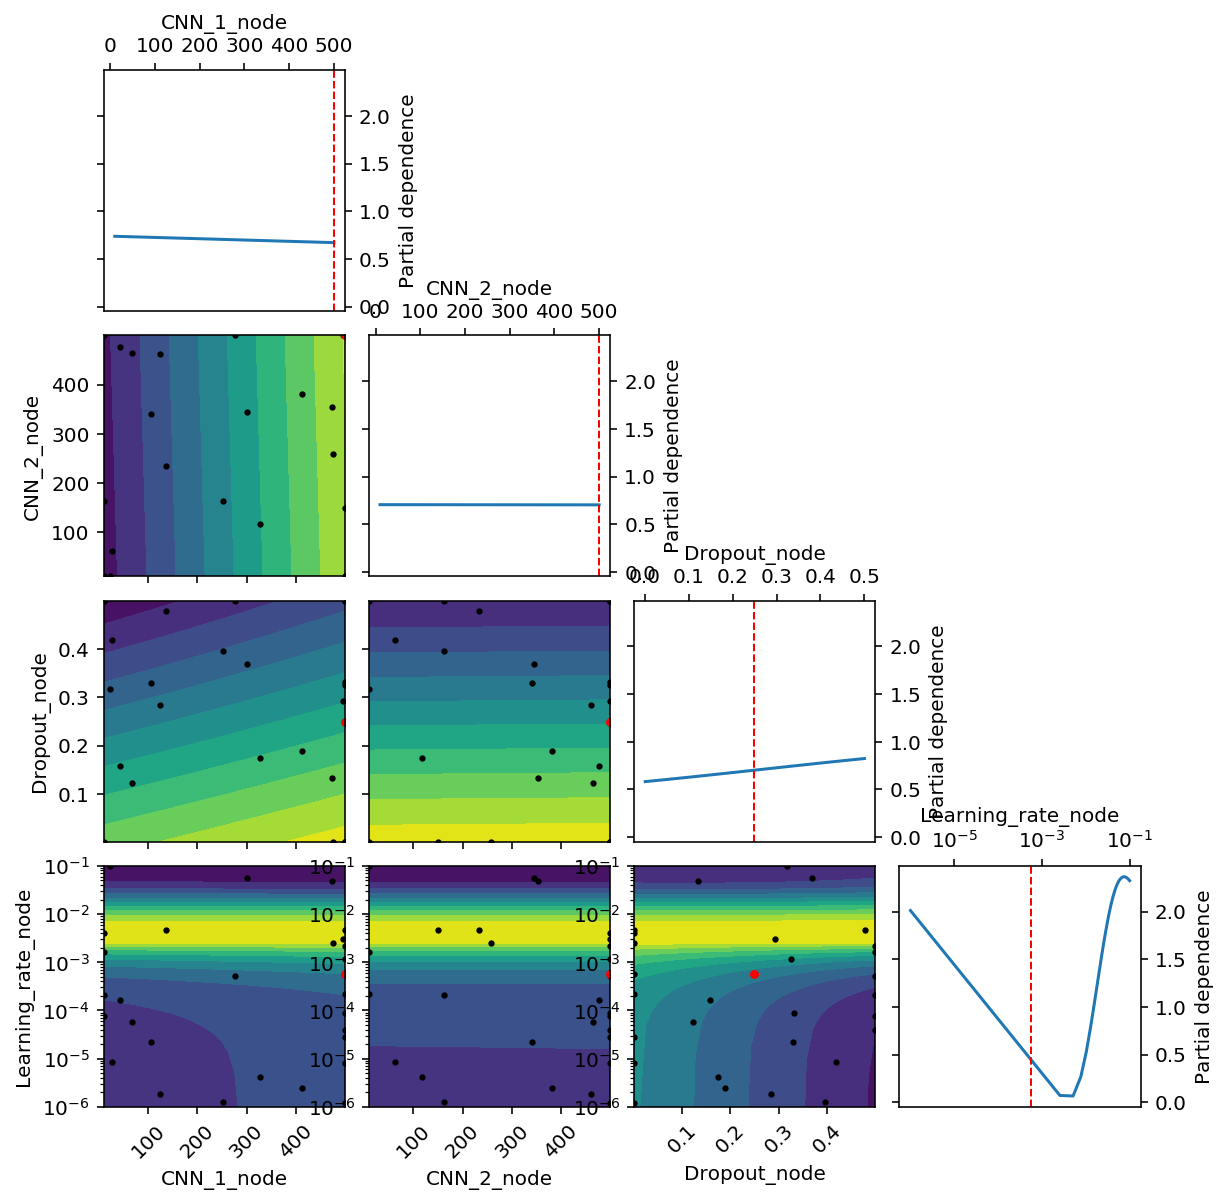

In [13]:
plot1 = plot_evaluations(gp_fitting)
plot2 = plot_objective(gp_fitting)

In [15]:
print(gp_fitting.fun)
print(gp_fitting.x)

0.03184698666721815
[500, 500, 0.2484899620209009, 0.0005619848790842752]


{'args': {'model_queue_size': None,
  'n_jobs': 1,
  'kappa': 1.96,
  'xi': 0.01,
  'n_restarts_optimizer': 5,
  'n_points': 10000,
  'callback': None,
  'verbose': False,
  'random_state': RandomState(MT19937) at 0x7FAACC753990,
  'y0': None,
  'x0': None,
  'acq_optimizer': 'auto',
  'acq_func': 'EI',
  'n_random_starts': 10,
  'n_calls': 30,
  'base_estimator': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                           kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5),
                           n_restarts_optimizer=2, noise='gaussian',
                           normalize_y=True, optimizer='fmin_l_bfgs_b',
                           random_state=1051425274),
  'dimensions': Space([Integer(low=10, high=500, prior='uniform', transform='normalize'),
         Integer(low=10, high=500, prior='uniform', transform='normalize'),
         Real(low=0.001, high=0.5, prior='uniform', transform='normalize'),
         Real(low=1e-06, high=0.1, prior='log-uniform', 

In [ ]:
#%run skopt_module.py

In [ ]:
%debug

In [ ]:
int(0.0001)